---
<center>

  # **Tarea 03**

**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import scipy as sc

In [2]:
def animar_esquema(
        numero_pasos: int, 
        matriz_video: np.ndarray,
        filename: str,
):
    """
    Genera y guarda una animación de la evolución de V usando esquema_prog_prog.

    Parámetros
    ----------
    numero_pasos : int
        Número de pasos de tiempo.
    matriz_video : np.ndarray
        Matriz que contiene las soluciones en cada paso de tiempo.
    filename : str
        Nombre del archivo de salida (GIF).
    """
    # Matriz para guardar los resultados
    V = matriz_video

    # --- Animación ---
    fig, ax = plt.subplots()
    (line,) = ax.plot(V[0, :], lw=2)
    ax.set_ylim(np.min(V), np.max(V))
    ax.grid(True)

    def update(frame):
        line.set_ydata(V[frame, :])
        return (line,)

    ani = FuncAnimation(fig, update, frames=range(numero_pasos + 1), interval=100, blit=True)

    # Guardar como GIF
    gif_name = filename + ".gif"
    ani.save(gif_name, writer=PillowWriter(fps=10))
    plt.close(fig)
    print(f"✅ Animación guardada en {filename}")

    return ani

# 1.

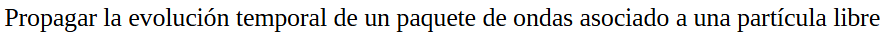

In [5]:
# Constante hbar
#hbar = 1.0545718e-34  # J·s
hbar = 1

# Definición de los parámetros del paquete de ondas
p0 = 8
x0 = -18
sigma = 0.5
A = 1/(np.sqrt(2 * np.pi) * sigma)

# Masa de la particula
m = 1

# Numero de pasos de tiempo y de espacio
N = 200

# Variable espacial
longirud_intervalo = 2000
x_prima = np.linspace(-longirud_intervalo, longirud_intervalo, N)

Tenemos que la E.D para una particula libre está dada por:

<center>

$\frac{\partial^2 \psi}{\partial x^2} + \frac{2m}{\hbar^2} E = 0 $

</center>

La evolución temporal va a estar dada por: 

<center>

$ \ket{\psi(t)} = e^{-i\hat{H}(t-t_0)/\hbar} \ket{\psi_0}$

</center>

Desarrollando el Hamiltoniano en sus autofunciones $\hat{H} \ket{\varphi} = E_n \ket{\varphi_n}  $

Con esto tenemos que el operador es:

<center>

$u(t,t_0) = \sum_n \ket{\varphi_n}\bra{\varphi_n} e^{-iE_n (t-t_0)/\hbar}   $

</center>

Donde $p= \pm \sqrt{2mE}$. Encontrando las autofunciones del momento se puede calcular la propagación del paquete de ondas, posteriormente se multiplica por la condición inicial $\psi(x',0)$ y se integra con respecto a $x'$

Para una particula libre el propagador va a ser:

<center>

$u(x,t,x',t') = (\frac{m}{2 \pi \hbar it})^{1/2} e^{im(x-x')^2/2\hbar(t-t_0)} $

</center>

En forma general el propagador queda de la forma:

<center>

$u(x,t,x',t') = \int_{-\infty}^{\infty} \braket{x|\varphi}\braket{\varphi|x} e^{-iE_n(t-t_0)/\hbar} d\varphi $

</center>

En el caso del momento:

<center>

$u(x,t,x',t') = \int_{-\infty}^{\infty} \braket{x|p}\braket{p|x} e^{-ip^2(t-t_0)/2m\hbar} dp$

</center>


In [15]:
# Función del propagador 
def propagador_particula_libre(
  variable_x,
  variable_x_prima,
  variable_t,
  variable_t_prima,
  masa_particula,      
):
    propagador = (
        np.sqrt((masa_particula/(2 * np.pi * hbar * 1j * variable_t))) 
        * np.exp((1j * masa_particula * (variable_x - variable_x_prima)**2) / (2 * hbar * (variable_t - variable_t_prima)))
    )
    return propagador

Lo primero que hay que realizar es la definición del paquete de ondas. Se va a definir el paquete de ondas como una gaussiana, la cual va a tener la siguiente expresión matemática:

Paquete de ondas: $A e^{-\frac{(x- \mu)^{2}}{2\sigma^2}}$

En donde: 

* $A$: es el valor más alto del paquete de ondas.
* $\mu$: posición central del paquete de ondas, donde se ubica el centro del paquete de ondas.
* $\sigma$: que tan ancho es el paquete de ondas. 

Pauqete de ondas que este localizado en $x_0$ con un momento inicial $p_0$, la expresión matemática va a estar dada por:

<center>

$\frac{1}{\sqrt{2 \pi}\sigma} e^{-\frac{(x-x_0)^2}{2\sigma^2}} e^{i p_0x/\hbar}   $

</center>

In [16]:
def paquete_ondas_libre(
    amplitud,
    localizacion_paquete,
    ancho_del_paquete,
    momento_inicial,
    hbar,
    valores_x,    
):
    paquete_libre = (
        amplitud * np.exp(-(valores_x - localizacion_paquete)**2 / (2 * ancho_del_paquete**2))
        * np.exp(1j * momento_inicial * valores_x / hbar)   # Momento inicial de la partícula, fase imaginaria
    )

    return paquete_libre

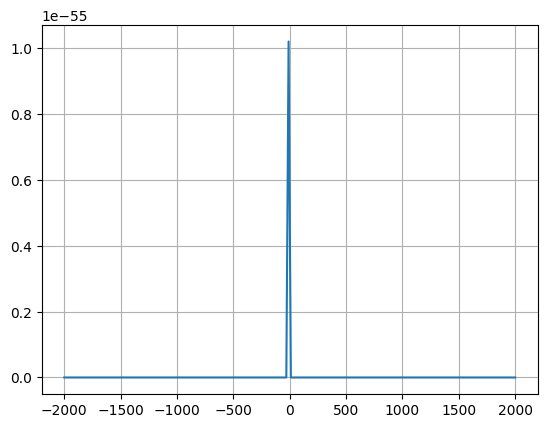

In [22]:
paquete_libre = paquete_ondas_libre(A, x0, sigma, p0, hbar, x_prima)

plt.plot(x_prima, np.abs(paquete_libre))
plt.grid()
plt.show()

Una vez definido el paquete de ondas y el propagador lo único que falta por realiar es la siguiente integral con respecto a $x'$

<center>

$ \psi(x,t) = \int_{-\infty}^{\infty} u(x,t,x',t')\psi(x',0) dx' $

</center>

In [6]:
x = np.linspace(-longirud_intervalo, 4*longirud_intervalo, N)
t = np.linspace(0.1, 8, N)

Como se va a utilizar el paquete de integración de ```scipy``` se van a redefinir las funciónes del paquete de ondas y la función del propagador.

In [ ]:
def paquete_ondas_scipy(variable_x_prima):
    paquete = (
        1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-(variable_x_prima - x0)**2 / (2 * sigma**2))
        * np.exp(1j * p0 * variable_x_prima / hbar)
    )

    return paquete

In [3]:
def propagador_particula_libre_sipy(variable_x, variable_x_prima, variable_t, variable_t_prima):
    propagador = (
        np.sqrt((m/(2 * np.pi * hbar * 1j * variable_t))) 
        * np.exp((1j * m * (variable_x - variable_x_prima)**2) / (2 * hbar * (variable_t - variable_t_prima)))
    )

    return propagador

In [21]:
psi = np.zeros((len(t), len(x)), dtype=complex)
psi_x = []


for j in x:
    integral = 0
    integral = sc.integrate.quad(
        lambda k: propagador_particula_libre_sipy(j, k, 0.1, 0) * paquete_ondas_scipy(k),
        -np.inf,
        np.inf
    )
    psi_x.append(integral)

print(len(psi_x))

200


c:\Users\samhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\integrate\_quadpack_py.py:608: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func, bound, infbounds, args, full_output,


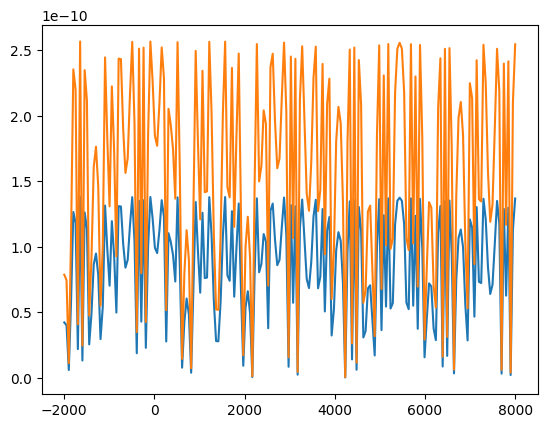

In [15]:
plt.plot(x, np.abs(psi_x))

C:\Users\samhu\AppData\Local\Temp\ipykernel_34480\3510239734.py:24: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(np.min(V), np.max(V))


IndexError: index 200 is out of bounds for axis 0 with size 200

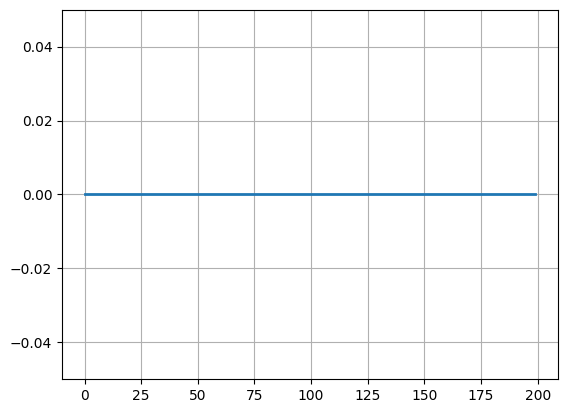

In [ ]:
# Visualización en gif de la propagación del paquete de ondas
animar_esquema(
    numero_pasos=N, 
    matriz_video=np.abs(psi),
    filename="evolucion_paquete_ondas_libre"
)

# 2.

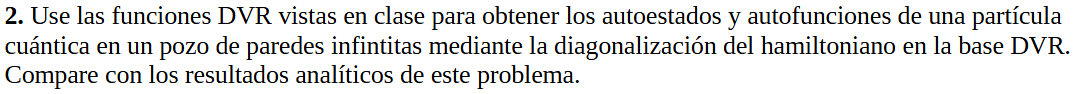

# 3.

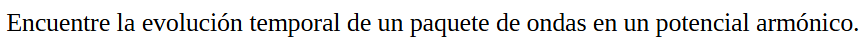

# 4.

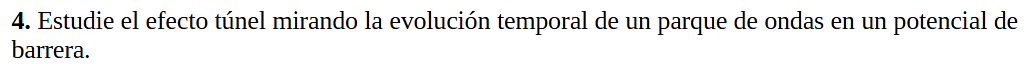